# Menggunakan `qutip.steadystate`

In [1]:
import numpy as np
from qutip import *
import matplotlib.pyplot as plt
import matplotlib as mpl
from jc_model import *
%matplotlib inline

In [2]:
wa = 2.0*np.pi # frekuensi eksitasi atom
wc = 0.1*wa        # frekuensi medan
N = 15 
use_rwa = False
gamma = 0.0                  # Laju disipasi atom
n_th = 0.0 
kappa = 0.01              # Laju disipasi medan

# Kuat interaksi
g_list = np.linspace(0, 3.5, 101)*2*np.pi

#operator
a = tensor(destroy(N), qeye(2))                            # Operator a
sm = tensor(qeye(N), destroy(2))                           # Operator sigma-minus

c_ops = op_collapse(gamma=gamma, kappa=kappa, a=a, sm=sm)

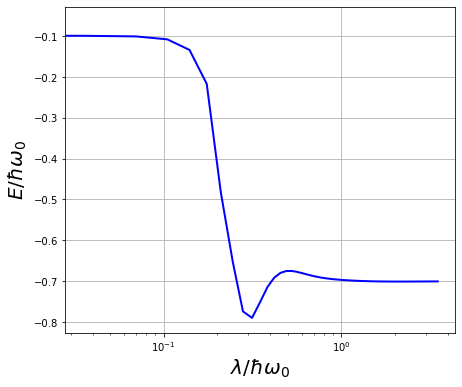

In [3]:
E_list = []
psi_list = []
n = []

for g in g_list:
    # Hamiltonian total
    H = Hamiltonian(omega_a=wa, omega_m=wc, g=g, n=N, a=a, sm=sm, rwa=use_rwa)
    
    steady_state = steadystate(H, c_op_list=c_ops, method='eigen')
    energi = expect(H, steady_state)
    number = expect(a.dag() * a, steady_state)
    
    n.append(number)
    E_list.append(energi/(wa))
    psi_list.append(steady_state)

fig, axes = plt.subplots(1, 1, sharex=True, figsize=(7,6))
axes.semilogx(g_list/wa, E_list, 'b', linewidth=2)
axes.set_ylabel(r"$E/\hbar\omega_{0}$", fontsize=20)
axes.set_xlabel(r"$\lambda/\hbar\omega_{0}$", fontsize=20)
axes.grid()

## Entropy (`steadystate`)

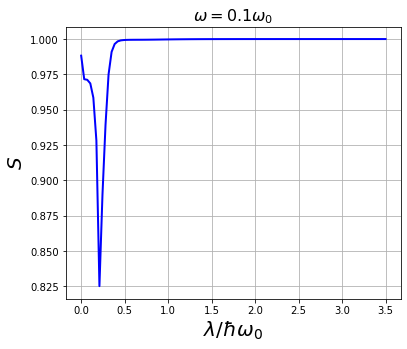

In [5]:
entropy = np.zeros(shape(g_list))

for idx, psi in enumerate(psi_list):
    # Menghitung entropi
    entropy[idx]   = Entropy(psi)

fig, axes = plt.subplots(1, 1, figsize=(6,5))
axes.plot(g_list/(2*np.pi), entropy, 'b', linewidth=2)
axes.set_ylabel(r"$S$", fontsize=20)
axes.set_xlabel(r"$\lambda/\hbar\omega_0$", fontsize=20)
axes.set_title(r"$\omega = %.1f \omega_{0}$" % (wc/wa), fontsize=16)
#axes.set(xlim=(0, 2.5), ylim=(0, 1))
axes.grid()

## Fungsi Wigner (`steadystate`)

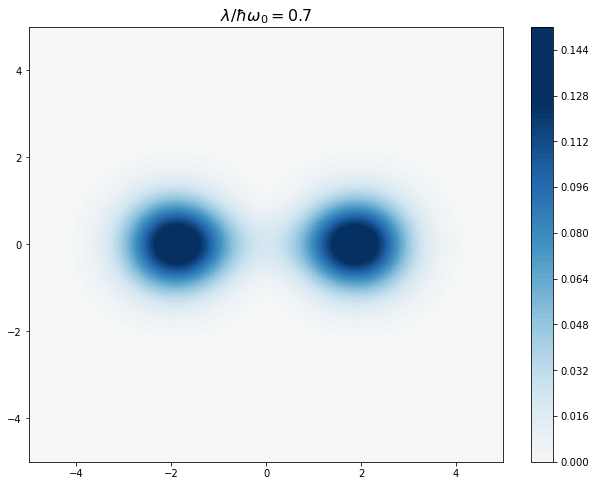

In [5]:
# Parameter
xvec = np.linspace(-5,5,500)
nrm = mpl.colors.Normalize(-.125,.125)
g = 0.7*wa

H = Hamiltonian(omega_a=wa, omega_m=wc, g=g, n=N, a=a, sm=sm, rwa=use_rwa)
steady_state = steadystate(H, c_ops)

W = Wigner(psi=steady_state, xvec=xvec, yvec=xvec)

# Plot fungsi Wigner
fig, axes = plt.subplots(1, 1, figsize=(10,8))
cs = axes.contourf(xvec, xvec, W, 100, cmap='RdBu', norm=nrm)
axes.set_title(r"$\lambda/\hbar\omega_0 = %.1f$" % (g/wa), fontsize=16)
fig.colorbar(cs, fraction=.1)